# Table of Contents

0. [Context](#context)

1. [Import the Dataset and Explore the Data](#import-the-dataset-and-explore-the-data)  
   Check data contents, provide descriptive statistics, and check for incoherencies in the data.  
   Explore data visually and extract relevant insights.  
   Explain your rationale and findings.  
   Do not forget to analyze multivariate relationships.  

   [1.1 Importing Libraries](#11-importing-libraries)  
   [1.2 Loading and Reading the Dataset](#12-loading-and-reading-the-dataset)  
   [1.3 Descriptive Statistics](#13-descriptive-statistics)  
   [1.4 Incoherencies](#14-incoherencies)  
   [1.5 Exploring Data Visually](#15-exploring-data-visually)  
   [1.6 Multivariate Relationships](#16-multivariate-relationships)  

2. [Clean and Pre-process the Data](#clean-and-pre-process-the-data)  
   Are there any missing values? Take action to handle them.  
   Check the dataset for outliers and pre-process them. Justify your decisions.  
   Deal with categorical variables.  
   Review current features and create extra features if needed. Explain your steps.  
   Perform data scaling. Explain the reasoning behind your choices.  

   [2.1 Missing Values](#21-missing-values)  
   [2.2 Duplicates](#22-duplicates)  
   [2.3 Outliers](#23-outliers)  
   [2.4 Categorical Data](#25-categorical-data)  
   [2.5 Feature Engineering](#26-feature-engineering)  
   [2.6 Data Scaling](#27-data-scaling)  

3. [Feature Selection](#feature-selection)  
   Define and implement an unambiguous strategy for feature selection.  
   Use methods discussed in the course.  
   Present and justify your final selection.  

   [3.1 Correlation Matrix](#31-correlation-matrix)  

4. [Build a Simple Model and Assess the Performance](#build-a-simple-model-and-assess-the-performance)  
   Identify the type of the problem and select the relevant algorithms.  
   Use cross-validation to assess performance. Which metrics did you use and why?  
   Train at least 1 model using the train dataset andwith a macro F1-score of more than 0.6.  
th a macro F1-score of more than 0.6.  
eature-engineering)  
   [2
ith a macro F1-score of more than 0.6.  


## Context

The New York Workers’ Compensation Board (WCB) administers and regulates workers’ compensation, disability, and other workers’ benefits. <br>
**WCB is responsible for assembling and deciding on claims whenever it becomes aware of a workplace injury**. Since 2000, the WCB has assembled and reviewed more than 5 million claims. However, manually reviewing all claims is an arduous and time-consuming process. For that reason, the WCB has reached out to Nova IMS to assist them in the creation of a model that can automate the decision-making whenever a new claim is received. <br>
.

Our task is t**create a classification model 
that can accurately predict the WCB’s final decision on what type o 
injury (Claim Injury Type) should be given to a cl To do that, the 
WCB has provided labelled data with all claims assembled betwee 
2020 and 202 <br>2.**. 

## Import the dataset and Explore the data

### 1.1 Importing Libraries

In [6]:
# Remember: library imports are ALWAYS at the top of the script, no exceptions!
import sqlite3
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import ceil
import statistics
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# for better resolution plots
%config InlineBackend.figure_format = 'retina' # optionally, you can change 'svg' to 'retina'

# Seeting seaborn style
sns.set()

### 1.2 Loading and Reading the Dataset

In [8]:
wcb = pd.read_csv('train_data.csv', sep = ',')   #sep is good to seperate data
pd.set_option('display.max_columns', None) #to be able too see all columns
wcb.head(5)

C:\Users\Asus\AppData\Local\Temp\ipykernel_22284\2000563159.py:1: DtypeWarning: Columns (29) have mixed types. Specify dtype option on import or set low_memory=False.
  wcb = pd.read_csv('train_data.csv', sep = ',')   #sep is good to seperate data


,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,Carrier Type,Claim Identifier,Claim Injury Type,County of Injury,COVID-19 Indicator,District Name,First Hearing Date,Gender,IME-4 Count,Industry Code,Industry Code Description,Medical Fee Region,OIICS Nature of Injury Description,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents
0,2019-12-30,31.0,N,2020-01-01,N,0.00,1988.0,2019-12-31,NaN,NEW HAMPSHIRE INSURANCE CO,1A. PRIVATE,5393875,2. NON-COMP,ST. LAWRENCE,N,SYRACUSE,NaN,M,NaN,44.0,RETAIL TRADE,I,NaN,27.0,FROM LIQUID OR GREASE SPILLS,10.0,CONTUSION,62.0,BUTTOCKS,13662,0.0,Not Work Related,1.0
1,2019-08-30,46.0,N,2020-01-01,Y,1745.93,1973.0,2020-01-01,2020-01-14,ZURICH AMERICAN INSURANCE CO,1A. PRIVATE,5393091,4. TEMPORARY,WYOMING,N,ROCHESTER,2020-02-21,F,4.0,23.0,CONSTRUCTION,I,NaN,97.0,REPETITIVE MOTION,49.0,SPRAIN OR TEAR,38.0,SHOULDER(S),14569,1.0,Not Work Related,4.0
2,2019-12-06,40.0,N,2020-01-01,N,1434.80,1979.0,2020-01-01,NaN,INDEMNITY INSURANCE CO OF,1A. PRIVATE,5393889,4. TEMPORARY,ORANGE,N,ALBANY,NaN,M,NaN,56.0,ADMINISTRATIVE AND SUPPORT AND WASTE MANAGEMEN...,II,NaN,79.0,OBJECT BEING LIFTED OR HANDLED,7.0,CONCUSSION,10.0,MULTIPLE HEAD INJURY,12589,0.0,Not Work Related,6.0
3,NaN,NaN,NaN,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,957648180,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-12-30,61.0,N,2020-01-01,N,NaN,1958.0,2019-12-31,NaN,STATE INSURANCE FUND,2A. SIF,5393887,2. NON-COMP,DUTCHESS,N,ALBANY,NaN,M,NaN,62.0,HEALTH CARE AND SOCIAL ASSISTANCE,II,NaN,16.0,"HAND TOOL, UTENSIL; NOT POWERED",43.0,PUNCTURE,36.0,FINGER(S),12603,0.0,Not Work Related,1.0


### 1.3. Descriptive Statistics

#### Shape

In [11]:
wcb.shape

(593471, 33)

In [12]:
wcb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 593471 entries, 0 to 593470
Data columns (total 33 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Accident Date                       570337 non-null  object 
 1   Age at Injury                       574026 non-null  float64
 2   Alternative Dispute Resolution      574026 non-null  object 
 3   Assembly Date                       593471 non-null  object 
 4   Attorney/Representative             574026 non-null  object 
 5   Average Weekly Wage                 545375 non-null  float64
 6   Birth Year                          544948 non-null  float64
 7   C-2 Date                            559466 non-null  object 
 8   C-3 Date                            187245 non-null  object 
 9   Carrier Name                        574026 non-null  object 
 10  Carrier Type                        574026 non-null  object 
 11  Claim Identifier          

### Any footnotes?

In [14]:
wcb.tail(5)
# No, there isn't any

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,Carrier Type,Claim Identifier,Claim Injury Type,County of Injury,COVID-19 Indicator,District Name,First Hearing Date,Gender,IME-4 Count,Industry Code,Industry Code Description,Medical Fee Region,OIICS Nature of Injury Description,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents
593466,NaN,NaN,NaN,2022-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,327160035,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
593467,2022-12-13,72.0,N,2022-12-31,N,0.0,1950.0,2022-12-31,NaN,TECHNOLOGY INSURANCE CO. INC.,1A. PRIVATE,6165075,2. NON-COMP,SULLIVAN,N,BINGHAMTON,NaN,F,NaN,48.0,TRANSPORTATION AND WAREHOUSING,I,NaN,25.0,FROM DIFFERENT LEVEL (ELEVATION),90.0,MULTIPLE PHYSICAL INJURIES ONLY,-9.0,MULTIPLE,12779,0.0,Not Work Related,3.0
593468,NaN,NaN,NaN,2022-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,249875936,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
593469,NaN,NaN,NaN,2022-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,120584215,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
593470,NaN,NaN,NaN,2022-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,818961390,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
wcb.describe().T

,count,mean,std,min,25%,50%,75%,max
Age at Injury,574026.0,4.211427e+01,1.425643e+01,0.0,31.0,42.0,54.0,117.0
Average Weekly Wage,545375.0,4.910883e+02,6.092918e+03,0.0,0.0,0.0,841.0,2828079.0
Birth Year,544948.0,1.886768e+03,4.146444e+02,0.0,1965.0,1977.0,1989.0,2018.0
Claim Identifier,593471.0,2.366760e+07,1.079271e+08,5393066.0,5593414.5,5791212.0,5991000.5,999891667.0
IME-4 Count,132803.0,3.207337e+00,2.832303e+00,1.0,1.0,2.0,4.0,73.0
Industry Code,564068.0,5.864531e+01,1.964417e+01,11.0,45.0,61.0,71.0,92.0
OIICS Nature of Injury Description,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
WCIO Cause of Injury Code,558386.0,5.438114e+01,2.587428e+01,1.0,31.0,56.0,75.0,99.0
WCIO Nature of Injury Code,558369.0,4.101384e+01,2.220752e+01,1.0,16.0,49.0,52.0,91.0
WCIO Part Of Body Code,556944.0,3.973815e+01,2.236594e+01,-9.0,33.0,38.0,53.0,99.0


In [16]:
wcb['Age at Injury'].describe()

count    574026.000000
mean         42.114270
std          14.256432
min           0.000000
25%          31.000000
50%          42.000000
75%          54.000000
max         117.000000
Name: Age at Injury, dtype: float64

### 1.4 Incoherencies

### Datatypes:

`Age at Injury` float -> int <br>
`Birth Year` float -> int <br>
`IME-4 Count` -> int <br>
`Industry Code` -> int <br>
`Agreement Reached` -> int <br>
`WCIO Cause of Injury Code` -> int <br>
`WCIO Nature of Injury Code` -> int <br>
`WCIO Part Of Body Code` -> int? there are negative values! <br>
`Number of Dependents` -> int <br>
`C-3 Date` -> transformar numa variavel binaria <br>
`First Hearing Date`	-> transformar numa variavel binaria <br>

### Change in datatypes


In [20]:
wcb_float_to_int = ['Age at Injury', 'Birth Year', 'IME-4 Count', 'Industry Code', 
                    'Agreement Reached', 'WCIO Cause of Injury Code', 
                    'WCIO Nature of Injury Code', 'WCIO Part Of Body Code', 
                    'Number of Dependents']

for col in wcb_float_to_int:
# Convert the column to a nullable integer type (Int64) while keeping NaNs
    wcb[col] = pd.to_numeric(wcb[col], errors='coerce').astype('Int64')

### 1.5 Exploring Data Visually

### Distribution of Data

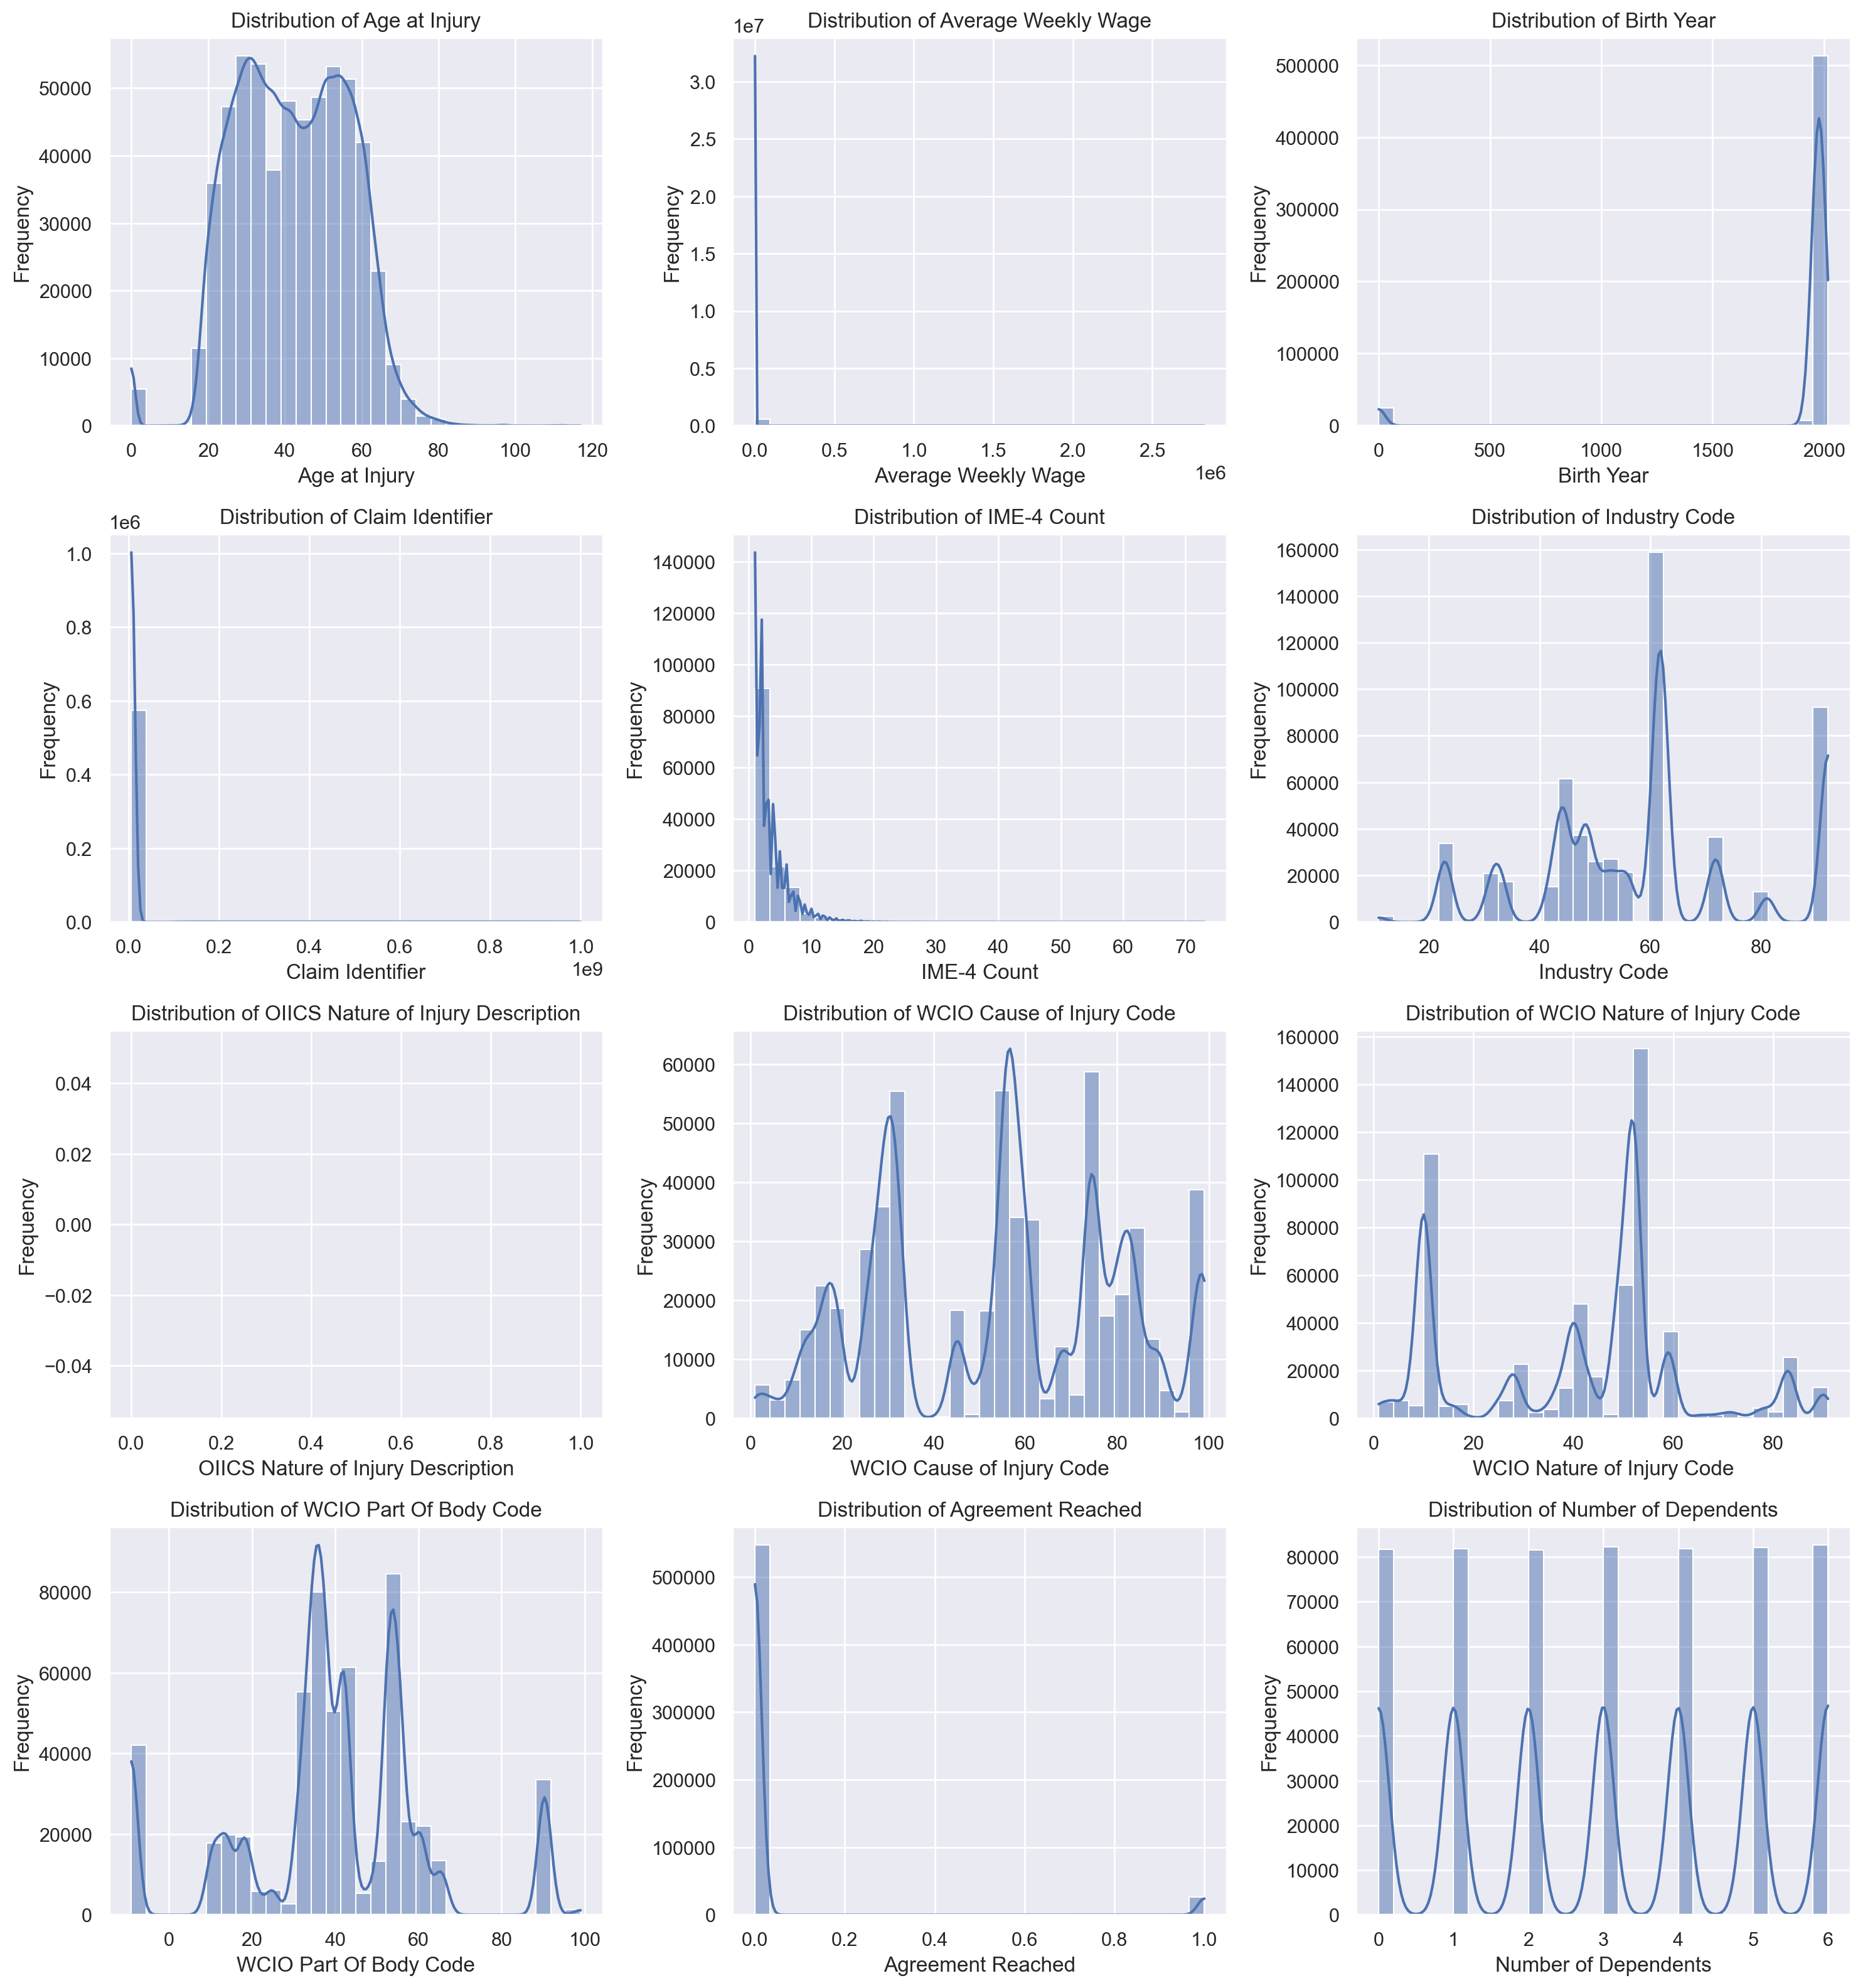

In [23]:
# Select numerical attributes
numerical_attributes = wcb.select_dtypes(include='number')

# Set the number of subplots
num_attributes = len(numerical_attributes.columns)
num_cols = 3  # Set the number of columns for the subplots
num_rows = (num_attributes // num_cols) + (num_attributes % num_cols > 0)  # Calculate rows needed

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 4))
axes = axes.flatten()  # Flatten the 2D array of axes

# Loop through each numerical attribute and plot its distribution
for i, column in enumerate(numerical_attributes.columns):
    sns.histplot(numerical_attributes[column], bins=30, kde=True, ax=axes[i])  # KDE adds a density curve
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

### Histograms

### 1.6 Multivariate Relationships

## 2. Clean and Pre-process the Data

### 2.1 Missing Values

#### Check for disposable rows or columns (with NaN, 0)


In [29]:
wcb.isna().sum()

Accident Date                          23134
Age at Injury                          19445
Alternative Dispute Resolution         19445
Assembly Date                              0
Attorney/Representative                19445
Average Weekly Wage                    48096
Birth Year                             48523
C-2 Date                               34005
C-3 Date                              406226
Carrier Name                           19445
Carrier Type                           19445
Claim Identifier                           0
Claim Injury Type                      19445
County of Injury                       19445
COVID-19 Indicator                     19445
District Name                          19445
First Hearing Date                    442673
Gender                                 19445
IME-4 Count                           460668
Industry Code                          29403
Industry Code Description              29403
Medical Fee Region                     19445
OIICS Natu


Check columns that sum to 0:

In [31]:
wcb.select_dtypes(include='number').sum()

Age at Injury                               24174686.0
Average Weekly Wage                       267827292.89
Birth Year                                1028190232.0
Claim Identifier                      14046033523169.0
IME-4 Count                                   425944.0
Industry Code                               33079940.0
OIICS Nature of Injury Description                 0.0
WCIO Cause of Injury Code                   30365669.0
WCIO Nature of Injury Code                  22900856.0
WCIO Part Of Body Code                      22131922.0
Agreement Reached                              26787.0
Number of Dependents                         1725843.0
dtype: Float64

Drop column that sums to 0:

In [33]:
wcb.drop(columns = ['OIICS Nature of Injury Description'], inplace = True)

Check how many missing values there are per column:

In [35]:
#First we ignore the 2 columns with no missing values - since these are identifying for cases, but don't add much info about each case
nan_columns = wcb.columns.drop(['Assembly Date', 'Claim Identifier'])

# Count how many rows have all NaN values in the selected columns
((wcb[nan_columns].isnull()) | (wcb[nan_columns] == 0)).all(axis=1).sum()

19445

In [36]:
# selecionar todas as colunas que têm valores nulos, dar drop a rows caso todas essas variaveis fossem nulas
# eliminar targets nulos, que acabou por ser feito indiretamente neste passo
wcb = wcb.dropna(subset = nan_columns, how = 'all')

In [37]:
wcb.shape
# We know have 574026 rows, less 19445 then before

(574026, 32)

In [38]:
#Check missing values again, after first clean-up
wcb.isnull().sum()

Accident Date                          3689
Age at Injury                             0
Alternative Dispute Resolution            0
Assembly Date                             0
Attorney/Representative                   0
Average Weekly Wage                   28651
Birth Year                            29078
C-2 Date                              14560
C-3 Date                             386781
Carrier Name                              0
Carrier Type                              0
Claim Identifier                          0
Claim Injury Type                         0
County of Injury                          0
COVID-19 Indicator                        0
District Name                             0
First Hearing Date                   423228
Gender                                    0
IME-4 Count                          441223
Industry Code                          9958
Industry Code Description              9958
Medical Fee Region                        0
WCIO Cause of Injury Code       

##### Columns
OIICS Nature of Injury Description <- drop <br>

##### Rows
19445 (and 14 columns with this exact number of rows w missing values) <- drop

In [77]:
non_null_percentage = wcb.notna().mean() * 100

# Convert it to a DataFrame for better display
non_null_df = non_null_percentage.reset_index()
non_null_df.columns = ['Variable', 'Non-Null Percentage']
non_null_df.sort_values('Non-Null Percentage', ascending=False)

,Variable,Non-Null Percentage
16,First Hearing Date,100.000000
11,Claim Identifier,100.000000
30,WCB Decision,100.000000
29,Agreement Reached,100.000000
21,Medical Fee Region,100.000000
17,Gender,100.000000
1,Age at Injury,100.000000
15,District Name,100.000000
14,COVID-19 Indicator,100.000000
13,County of Injury,100.000000


In [108]:
wcb['Birth Year'] = wcb.apply(lambda x: x['Accident Date'].year - x['Age at Injury'] if pd.isna(x['Birth Year']) else x['Birth Year'], axis=1)

In [114]:
wcb[wcb['Accident Date'].isna()]

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,Carrier Type,Claim Identifier,Claim Injury Type,County of Injury,COVID-19 Indicator,District Name,First Hearing Date,Gender,IME-4 Count,Industry Code,Industry Code Description,Medical Fee Region,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents,Accident Year
370,NaT,0,N,2020-01-02,Y,0.0,1959.0,NaN,1,STARR INDEMNITY & LIABILITY CO,1A. PRIVATE,5394068,2. NON-COMP,BRONX,N,NYC,0,M,<NA>,23,CONSTRUCTION,IV,<NA>,NaN,<NA>,NaN,<NA>,NaN,NaN,0,Not Work Related,6,NaN
396,NaT,0,N,2020-01-02,Y,0.0,1984.0,NaN,1,LM INSURANCE CORP,1A. PRIVATE,5393794,2. NON-COMP,ONONDAGA,N,SYRACUSE,0,F,<NA>,<NA>,NaN,II,<NA>,NaN,<NA>,NaN,<NA>,NaN,13212,0,Not Work Related,4,NaN
486,NaT,0,N,2020-01-02,Y,0.0,0.0,2021-03-26,1,"CNY OTHER THAN ED, HED WATER",3A. SELF PUBLIC,5394023,2. NON-COMP,NEW YORK,N,NYC,1,M,<NA>,92,PUBLIC ADMINISTRATION,UK,90,OTHER THAN PHYSICAL CAUSE OF INJURY,31,HEARING LOSS OR IMPAIRMENT,13,EAR(S),34997,0,Not Work Related,2,NaN
599,NaT,0,N,2020-01-02,Y,0.0,1967.0,NaN,1,AMERICAN ZURICH INSURANCE CO,1A. PRIVATE,5393999,1. CANCELLED,ALBANY,N,ALBANY,0,M,<NA>,<NA>,NaN,II,<NA>,NaN,<NA>,NaN,<NA>,NaN,12209,0,Not Work Related,6,NaN
760,NaT,0,N,2020-01-03,Y,0.0,1971.0,NaN,1,NEW HAMPSHIRE INSURANCE CO,1A. PRIVATE,5394824,1. CANCELLED,KINGS,N,NYC,0,M,<NA>,32,MANUFACTURING,IV,<NA>,NaN,<NA>,NaN,<NA>,NaN,11231,0,Not Work Related,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
592566,NaT,0,N,2022-12-29,Y,0.0,1967.0,NaN,1,STATE INSURANCE FUND,2A. SIF,6163633,1. CANCELLED,QUEENS,N,NYC,0,F,<NA>,<NA>,NaN,IV,<NA>,NaN,<NA>,NaN,<NA>,NaN,11422,0,Not Work Related,1,NaN
592914,NaT,0,N,2022-12-30,Y,0.0,1961.0,2023-01-10,1,COUNTY OF NASSAU,3A. SELF PUBLIC,6164216,2. NON-COMP,NASSAU,N,NYC,1,M,<NA>,92,PUBLIC ADMINISTRATION,IV,52,CONTINUAL NOISE,31,HEARING LOSS OR IMPAIRMENT,13,EAR(S),11756,0,Not Work Related,0,NaN
592964,NaT,0,N,2022-12-30,Y,0.0,0.0,2023-01-10,1,NYC TRANSIT AUTHORITY,3A. SELF PUBLIC,6164179,2. NON-COMP,SUFFOLK,N,HAUPPAUGE,0,M,<NA>,48,TRANSPORTATION AND WAREHOUSING,UK,99,"OTHER - MISCELLANEOUS, NOC",78,CARPAL TUNNEL SYNDROME,-9,MULTIPLE,22473,0,Not Work Related,3,NaN
592978,NaT,0,N,2022-12-30,Y,0.0,1972.0,2023-01-20,1,LM INSURANCE CORP,1A. PRIVATE,6164933,2. NON-COMP,KINGS,N,NYC,0,M,<NA>,23,CONSTRUCTION,IV,60,"STRAIN OR INJURY BY, NOC",78,CARPAL TUNNEL SYNDROME,39,WRIST (S) & HAND(S),11221,0,Not Work Related,6,NaN


In [120]:
wcb['Age at Injury'].describe()

count     574026.0
mean      42.11427
std      14.256432
min            0.0
25%           31.0
50%           42.0
75%           54.0
max          117.0
Name: Age at Injury, dtype: Float64

In [110]:
non_null_percentage = wcb.notna().mean() * 100

# Convert it to a DataFrame for better display
non_null_df = non_null_percentage.reset_index()
non_null_df.columns = ['Variable', 'Non-Null Percentage']
non_null_df.sort_values('Non-Null Percentage', ascending=False)

,Variable,Non-Null Percentage
16,First Hearing Date,100.000000
10,Carrier Type,100.000000
17,Gender,100.000000
1,Age at Injury,100.000000
15,District Name,100.000000
14,COVID-19 Indicator,100.000000
13,County of Injury,100.000000
12,Claim Injury Type,100.000000
11,Claim Identifier,100.000000
9,Carrier Name,100.000000


### Proposal to fill missing values (for numerical data)
`Age at Injury`                        can be replaced with median <br>
`Average Weekly Wage`                   can be replaced with the average weekly age per age for the rows with values <br>
`Birth Year`                            if there is age, 2024-age at injury <br>
`IME-4 Count`                           Number of IME-4 forms received per claim. The IME-4 form is 
the “Independent Examiner's Report of Independen  Medica 
Examination” for m.missing values = 0 <br>
`Industry Code`                         <> NaN. if industry description isn't NaN, we can check code from this column <br>
`OIICS Nature of Injury Description`  <> oiics manual 2007 downloaded   <br>
`WCIO Cause of Injury Code`           site blocked   <br>
`WCIO Nature of Injury Code`          site blocked   <br>
`WCIO Part Of Body Code`              site blocked <br>
`Agreement Recahe `  Binary value: Yes if there is an agreement without  h einvolvement of the WCB -> "unknow:n at te  start of a clam" -> shol d return 0 or 1m<rb

`Number of Dependents` this variable is not explained.  NaN we can assume it's 0 dependent?s <br4

#### Notes

`WCIO Part Of Body Code` -> there are negative values!!! <br>
Dados apenas de 2020 ate 2022 <br>
Transformar a data em anos e meses <br>
Outliers nas idades (boxplot) <br>

### 2.2 Duplicates

In [45]:
wcb.duplicated().sum()
#There is none to drop

0

In [46]:
duplicate_rows = wcb.duplicated()

# If you want to return the entire DataFrame with only the duplicate rows:
duplicate_rows_df = wcb[duplicate_rows]

duplicate_rows_df

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,Carrier Type,Claim Identifier,Claim Injury Type,County of Injury,COVID-19 Indicator,District Name,First Hearing Date,Gender,IME-4 Count,Industry Code,Industry Code Description,Medical Fee Region,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents


### 2.3 Outliers

In [48]:
wcb.describe().T

,count,mean,std,min,25%,50%,75%,max
Age at Injury,574026.0,42.11427,14.256432,0.0,31.0,42.0,54.0,117.0
Average Weekly Wage,545375.0,491.088321,6092.91812,0.0,0.0,0.0,841.0,2828079.0
Birth Year,544948.0,1886.767604,414.644423,0.0,1965.0,1977.0,1989.0,2018.0
Claim Identifier,574026.0,5778955.610948,222308.226013,5393066.0,5586764.25,5778282.5,5971328.75,6165685.0
IME-4 Count,132803.0,3.207337,2.832303,1.0,1.0,2.0,4.0,73.0
Industry Code,564068.0,58.645305,19.644175,11.0,45.0,61.0,71.0,92.0
WCIO Cause of Injury Code,558386.0,54.381143,25.874281,1.0,31.0,56.0,75.0,99.0
WCIO Nature of Injury Code,558369.0,41.013839,22.207521,1.0,16.0,49.0,52.0,91.0
WCIO Part Of Body Code,556944.0,39.738146,22.36594,-9.0,33.0,38.0,53.0,99.0
Agreement Reached,574026.0,0.046665,0.210921,0.0,0.0,0.0,0.0,1.0


### 2.4 Categorical Data

#### Understand unique values <br>
`Accident Date` <br>
`Alternative Dispute Resolution` <br>
`Assembly Date` <br>`Attorney/Representative` <br>
`C-2 Date` turn into a binary outcome where 0 is form wasn't received and 1 is form was received <br>
`C-3 Date` <br>
`Carrier Name` <br>
`Carrier Type` <br>
`Claim Injury Type` <br>
`County of Injury` <br>
`COVID-19 Indicator` <br>
`District Name` <br>
`First Hearing Date` <br>
`Gender` <br>
`Industry Code Description` <br>
`Medical Fee Re` <br>
`WCIO Cause of Injury Description` <br>
`WCIO Nature of Injury Description` <br>
`WCIO Part Of Body Description` <br>
`Zip Code`  <br>
`WCB Decision` <br>

#### Notes
`WCB Decision` is always 'not work related' <br>
`Gender`returns M, F, Y, U -> what does Y and U stand for?

In [52]:
wcb[['WCIO Part Of Body Code', 'WCIO Part Of Body Description']] # rever depois de fazer a correlação
# ver também 21 a 26

,WCIO Part Of Body Code,WCIO Part Of Body Description
0,62,BUTTOCKS
1,38,SHOULDER(S)
2,10,MULTIPLE HEAD INJURY
4,36,FINGER(S)
5,38,SHOULDER(S)
...,...,...
593451,42,LOWER BACK AREA
593455,35,HAND
593456,34,WRIST
593457,55,ANKLE


In [53]:
categorical = wcb.select_dtypes(include=['object', 'category'])
categorical.columns

Index(['Accident Date', 'Alternative Dispute Resolution', 'Assembly Date',
       'Attorney/Representative', 'C-2 Date', 'C-3 Date', 'Carrier Name',
       'Carrier Type', 'Claim Injury Type', 'County of Injury',
       'COVID-19 Indicator', 'District Name', 'First Hearing Date', 'Gender',
       'Industry Code Description', 'Medical Fee Region',
       'WCIO Cause of Injury Description', 'WCIO Nature of Injury Description',
       'WCIO Part Of Body Description', 'Zip Code', 'WCB Decision'],
      dtype='object')

In [54]:
wcb.describe(include=['object', 'category']).T

,count,unique,top,freq
Accident Date,570337,5539,2020-03-01,1245
Alternative Dispute Resolution,574026,3,N,571412
Assembly Date,574026,897,2020-03-06,1413
Attorney/Representative,574026,2,N,392291
C-2 Date,559466,2475,2021-05-11,1847
C-3 Date,187245,1648,2021-04-21,350
Carrier Name,574026,2046,STATE INSURANCE FUND,111144
Carrier Type,574026,8,1A. PRIVATE,285368
Claim Injury Type,574026,8,2. NON-COMP,291078
County of Injury,574026,63,SUFFOLK,60430


In [55]:
unique = wcb.select_dtypes(include=['object', 'category']).apply(lambda x: x.unique(), axis=0)
pd.set_option('display.max_colwidth', 100)  # No limit on column width
unique

Accident Date                        [2019-12-30, 2019-08-30, 2019-12-06, 2019-12-26, 2019-12-28, 2019-12-23, 2019-12-29, 2019-12-14,...
Alternative Dispute Resolution                                                                                                 [N, Y, U]
Assembly Date                        [2020-01-01, 2020-01-02, 2020-01-03, 2020-01-06, 2020-01-07, 2020-01-08, 2020-01-09, 2020-01-10,...
Attorney/Representative                                                                                                           [N, Y]
C-2 Date                             [2019-12-31, 2020-01-01, 2019-07-31, 2020-01-02, 2020-01-14, 2020-01-10, 2020-02-27, 2020-01-09,...
C-3 Date                             [nan, 2020-01-14, 2020-03-04, 2020-01-07, 2020-01-03, 2019-12-31, 2020-01-24, 2020-01-17, 2019-1...
Carrier Name                         [NEW HAMPSHIRE INSURANCE CO, ZURICH AMERICAN INSURANCE CO, INDEMNITY INSURANCE CO OF, STATE INSU...
Carrier Type                         [1A.

### 2.5 Feature Engineering

In [57]:
wcb[wcb['WCIO Part Of Body Code'] == -9] 

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,Carrier Type,Claim Identifier,Claim Injury Type,County of Injury,COVID-19 Indicator,District Name,First Hearing Date,Gender,IME-4 Count,Industry Code,Industry Code Description,Medical Fee Region,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents
128,2019-12-19,42,N,2020-01-01,Y,1093.74,1977,2019-12-31,2020-01-14,PUBLIC EMPLOYERS RISK MGMT.,3A. SELF PUBLIC,5393974,4. TEMPORARY,DUTCHESS,N,ALBANY,2020-08-27,M,6,92,PUBLIC ADMINISTRATION,II,99,"OTHER - MISCELLANEOUS, NOC",52,STRAIN OR TEAR,-9,MULTIPLE,12578,1,Not Work Related,6
235,2019-09-13,36,N,2020-01-02,Y,1500.00,1983,2020-02-07,2019-12-27,"POLICE, FIRE, SANITATION",3A. SELF PUBLIC,5393785,5. PPD SCH LOSS,SUFFOLK,N,HAUPPAUGE,2020-03-12,F,3,92,PUBLIC ADMINISTRATION,IV,81,"STRUCK OR INJURED, NOC",10,CONTUSION,-9,MULTIPLE,11704,0,Not Work Related,5
790,2019-12-12,57,N,2020-01-03,Y,764.35,1962,2020-01-03,2020-01-09,PROPERTY AND CASUALTY,1A. PRIVATE,5395679,5. PPD SCH LOSS,BRONX,N,NYC,2020-02-18,M,<NA>,31,MANUFACTURING,IV,29,ON SAME LEVEL,52,STRAIN OR TEAR,-9,MULTIPLE,10466,0,Not Work Related,4
1006,2018-01-06,50,N,2020-01-03,N,0.00,1967,2020-01-03,NaN,NEW HAMPSHIRE INSURANCE CO,1A. PRIVATE,5395006,2. NON-COMP,BRONX,N,NYC,NaN,M,<NA>,23,CONSTRUCTION,UK,97,REPETITIVE MOTION,59,"ALL OTHER SPECIFIC INJURIES, NOC",-9,MULTIPLE,07726,0,Not Work Related,0
2276,2019-12-26,33,N,2020-01-06,Y,670.00,<NA>,2020-01-06,2020-12-08,"SYRACUSE, CITY OF",3A. SELF PUBLIC,5396338,4. TEMPORARY,ONONDAGA,N,SYRACUSE,2021-02-16,M,9,92,PUBLIC ADMINISTRATION,II,56,LIFTING,52,STRAIN OR TEAR,-9,MULTIPLE,13208,0,Not Work Related,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
593433,2022-11-23,30,N,2022-12-30,Y,0.00,1992,2023-01-06,2022-12-21,WESCO INSURANCE COMPANY,1A. PRIVATE,6164364,2. NON-COMP,QUEENS,N,NYC,NaN,F,<NA>,44,RETAIL TRADE,IV,26,FROM LADDER OR SCAFFOLDING,52,STRAIN OR TEAR,-9,MULTIPLE,NaN,0,Not Work Related,5
593438,2022-05-03,52,N,2022-12-30,N,1555.03,1970,2022-12-29,NaN,ONONDAGA COUNTY SELF INS DIV,3A. SELF PUBLIC,6165182,4. TEMPORARY,ONONDAGA,N,SYRACUSE,NaN,F,2,92,PUBLIC ADMINISTRATION,II,97,REPETITIVE MOTION,78,CARPAL TUNNEL SYNDROME,-9,MULTIPLE,13215,0,Not Work Related,3
593439,2022-12-26,30,N,2022-12-30,Y,1234.19,1992,2022-12-30,NaN,"TONAWANDA, TOWN OF",3A. SELF PUBLIC,6165293,4. TEMPORARY,ERIE,N,BUFFALO,2024-05-21,M,1,92,PUBLIC ADMINISTRATION,I,79,OBJECT BEING LIFTED OR HANDLED,90,MULTIPLE PHYSICAL INJURIES ONLY,-9,MULTIPLE,14150,0,Not Work Related,3
593442,2022-12-22,53,N,2022-12-30,Y,0.00,1969,2022-12-30,NaN,INDEMNITY INS. OF N AMERICA,1A. PRIVATE,6165175,2. NON-COMP,NASSAU,N,NYC,NaN,F,1,72,ACCOMMODATION AND FOOD SERVICES,IV,29,ON SAME LEVEL,52,STRAIN OR TEAR,-9,MULTIPLE,11570,0,Not Work Related,1


In [58]:
# transformar o -9 em 9, deve ter sido um erro

In [59]:
wcb['IME-4 Count']

0         <NA>
1            4
2         <NA>
4         <NA>
5         <NA>
          ... 
593451    <NA>
593455    <NA>
593456       1
593457    <NA>
593467    <NA>
Name: IME-4 Count, Length: 574026, dtype: Int64

In [60]:
wcb['C-3 Date'] = wcb['C-3 Date'].apply(lambda x: 0 if pd.isna(x) else 1)

In [61]:
wcb['First Hearing Date'] = wcb['First Hearing Date'].apply(lambda x: 0 if pd.isna(x) else 1)

In [62]:
wcb['IME-4 Count']

0         <NA>
1            4
2         <NA>
4         <NA>
5         <NA>
          ... 
593451    <NA>
593455    <NA>
593456       1
593457    <NA>
593467    <NA>
Name: IME-4 Count, Length: 574026, dtype: Int64

In [63]:
wcb['IME-4 Count'].isna().sum()

441223

In [65]:
wcb['IME-4 Count'].nunique()

41

In [ ]:
wcb['IME-4 Count'].describe()

In [ ]:
wcb.shape

In [ ]:
# transformar as datas em mês e ano
wcb['Accident Date'] = pd.to_datetime(wcb['Accident Date'], errors='coerce')

# Extract year and month, and combine them into a new column
wcb['Accident Date'] = wcb['Accident Date'].dt.to_period('M')

# Display the new column
print(wcb['Accident Date'])

In [ ]:
wcb = wcb[(wcb['Accident Date'].dt.year >= 2020) & (wcb['Accident Date'].dt.year <= 2022)]

# "WCB has provided labelled data with all claims assembled between 2020 and 2022" accident date or assembly date?

#### Choose column for index
`Claim Identifier` ->returns unique values and there is one identifying value for each row/case

In [ ]:
#Check which unique values there are for this column and store as variable
id = wcb['Claim Identifier'].nunique()

In [ ]:
#count all unique values and see if its the same number as total rows
id == len(wcb)

In [ ]:
wcb = wcb.set_index('Claim Identifier')

In [ ]:
wcb

### 2.6 Data scaling



In [ ]:
#doesnt work because you have to change datatypes

# Separate features
numerical_features = wcb.select_dtypes(include='number').columns.tolist()
categorical_features = wcb.select_dtypes(include=['object', 'category']).columns.tolist()

# Create a preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), numerical_features),  # Scale numerical features
        ('cat', OneHotEncoder(), categorical_features)  # One-Hot Encode categorical features
    ]
)

# Fit and transform the data
scaled_data = preprocessor.fit_transform(wcb)

# Convert back to DataFrame
scaled_columns = (
    numerical_features + 
    list(preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features))
)
scaled_wcb_df = pd.DataFrame(scaled_data, columns=scaled_columns)

# Display the scaled DataFrame
print(scaled_wcb_df)

# Aggregations to comprehend data

In [ ]:
wcb.columns

In [ ]:
wcb.groupby(['Claim Injury Type','Gender']).agg({'Average Weekly Wage':['mean', 'min', 'max']})

In [ ]:
wcb.groupby(['Claim Injury Type','District Name']).agg({'Age at Injury':['mean', 'min', 'max'], 'Average Weekly Wage':['mean', 'min', 'max']})

In [ ]:
wcb.groupby('Age at Injury').agg({'Number of Dependents':['mean', 'min', 'max']})

# Visualizations
for outliers analysis, and more in-depth conclusions

## Day of the year (date) - needs improvement

In [87]:
wcb['Day of Year'] = wcb['Accident Date'].dt.dayofyear

AttributeError: Can only use .dt accessor with datetimelike values

In [ ]:
# Map Gender to numerical values (e.g., 0 for Male, 1 for Female)
wcb['Gender Numeric'] = wcb['Gender'].map({'M': 0, 'F': 1})

In [ ]:
# Create the scatter plot
plt.figure(figsize=(12, 6))
plt.scatter(wcb['Day of Year'], wcb['Gender Numeric'], alpha=0.6, color='skyblue')

# Add labels and title
plt.title('Scatter Plot of Accident Date vs Gender', fontsize=14)
plt.xlabel('Day of the Year (Accident Date)', fontsize=12)
plt.ylabel('Gender (0=M, 1=F)', fontsize=12)

# Customizing the y-ticks for better interpretation
plt.yticks([0, 1], ['M', 'F'])

# Show the plot
plt.show()

## Age at Injury

In [ ]:
# Define age categories
bins = [0, 17, 30, 40, 50, 60, 74, 100]
labels = ['0-17', '18-30', '31-40', '41-50', '51-60', '61-74', '75+']

# Create a new column for age categories
wcb['Age Category'] = pd.cut(wcb['Age at Injury'], bins=bins, labels=labels, right=False)

In [ ]:
# Count the number of occurrences in each age category
age_distribution = wcb['Age Category'].value_counts()

In [ ]:
# Plot the pie chart
plt.figure(figsize=(7, 7))  # Set the figure size

age_distribution.plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'lightgreen', 'coral', 'orange', 'purple', 'yellow', 'pink'])

# Customize the plot
plt.title('Age Distribution of Accidents')
plt.ylabel('')  # Remove the default y-label (which shows "Age Category")

# Show the plot
plt.show()

In [ ]:
wcb['Age at Injury'].plot(kind='box')

In [ ]:
wcb['IME-4 Count'].plot(kind='box')

In [ ]:
statistics.variance(wcb['Age at Injury'].dropna())

## Histograms of all variables

In [ ]:
# Step 2: Loop through each column (variable) and create a histogram
for i in range(len(wcb.columns)):
    column_name = wcb.columns[i]  # Get the column name
    plt.figure(figsize=(8, 5))  # Optional: Set figure size for better visuals
    plt.hist(wcb[column_name].dropna(), bins=30, edgecolor='k', alpha=0.7)  # Drop NaNs and create the histogram
    plt.title(f'Histogram of {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('Frequency')
    plt.grid(True)  # Optional: Add grid
    plt.show()  # Display the plot

In [ ]:
wcb['Gender'].value_counts().plot(kind='bar')

In [ ]:
wcb['Alternative Dispute Resolution'].value_counts().plot(kind='bar')

## Correlation Matrix

In [ ]:
# Step 1: Select only numerical columns
wcb = wcb.drop('OIICS Nature of Injury Description', axis=1)
numerical_df = wcb.select_dtypes(include='number')

# Step 2: Calculate the correlation matrix
correlation_matrix = numerical_df.corr()

# Step 3: Visualize the correlation matrix
plt.figure(figsize=(10, 8))  # Optional: Adjusts the size of the plot
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

# Display the plot
plt.title('Correlation Matrix (Numerical Variables Only)')
plt.show()